In [ ]:
import pandas as pd
import os 

current_path = os.getcwd()
data_file_path = os.path.join(current_path, 'menu.csv')
nutrition_df = pd.read_csv(data_file_path)

In [2]:
print('Menu DataFrame shape:', nutrition_df.shape)

Menu DataFrame shape: (260, 24)


In [3]:
print(nutrition_df.head())

    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

In [4]:
print(nutrition_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [6]:
# sales_df.dropna(subset=['Date'], inplace=True)
# print(sales_df.columns)
print(nutrition_df.isnull().sum())

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [11]:
numeric_cols = nutrition_df.select_dtypes(include=['float64', 'int64']).columns
# nutrition_df[numeric_cols] = nutrition_df[numeric_cols].apply(pd.to_numeric) 
print(nutrition_df[numeric_cols].describe())

          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

In [14]:
mode_values = nutrition_df.mode().iloc[0]
print('Mode Values:\n', mode_values)

Mode Values:
 Category                                Coffee & Tea
Item                             1% Low Fat Milk Jug
Serving Size                            16 fl oz cup
Calories                                         0.0
Calories from Fat                                0.0
Total Fat                                        0.0
Total Fat (% Daily Value)                        0.0
Saturated Fat                                    0.0
Saturated Fat (% Daily Value)                    0.0
Trans Fat                                        0.0
Cholesterol                                      0.0
Cholesterol (% Daily Value)                      0.0
Sodium                                         180.0
Sodium (% Daily Value)                           6.0
Carbohydrates                                    0.0
Carbohydrates (% Daily Value)                   14.0
Dietary Fiber                                    1.0
Dietary Fiber (% Daily Value)                    0.0
Sugars                          

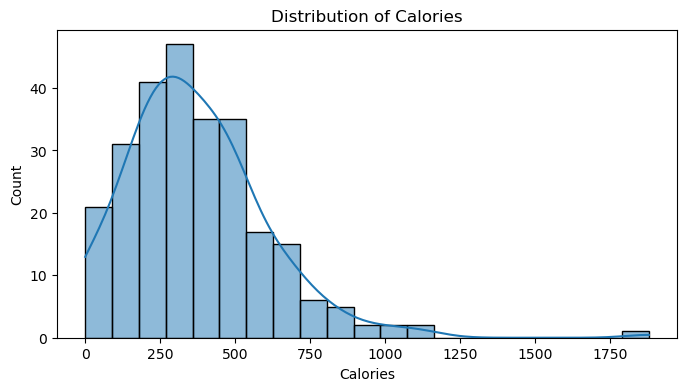

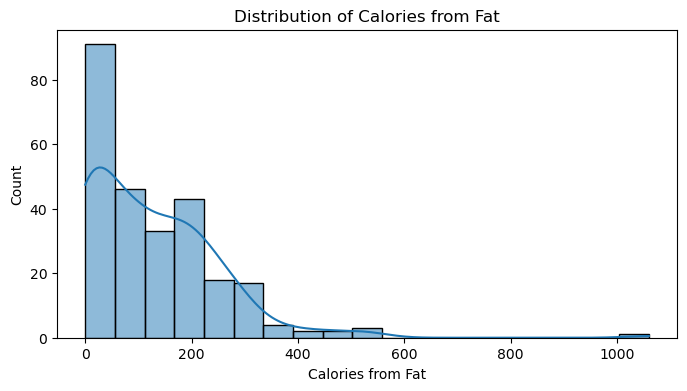

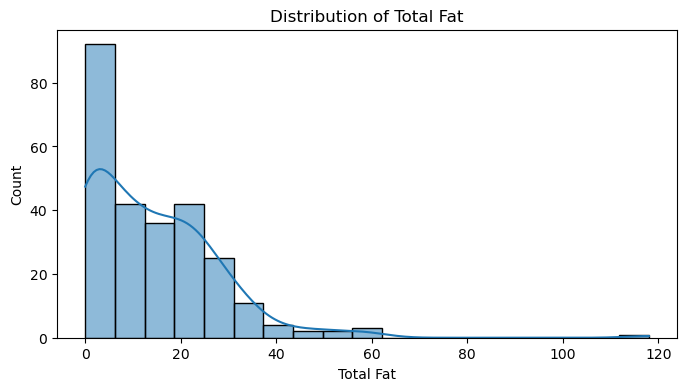

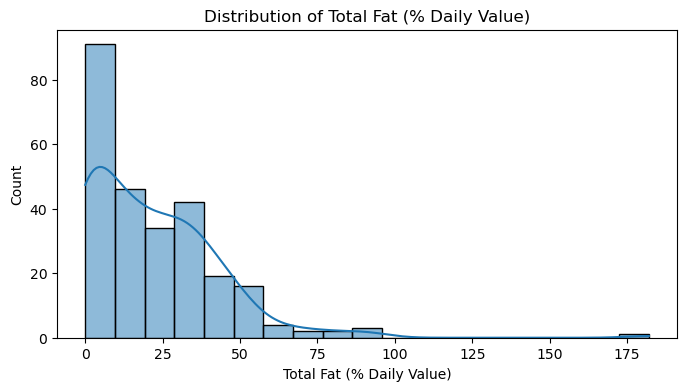

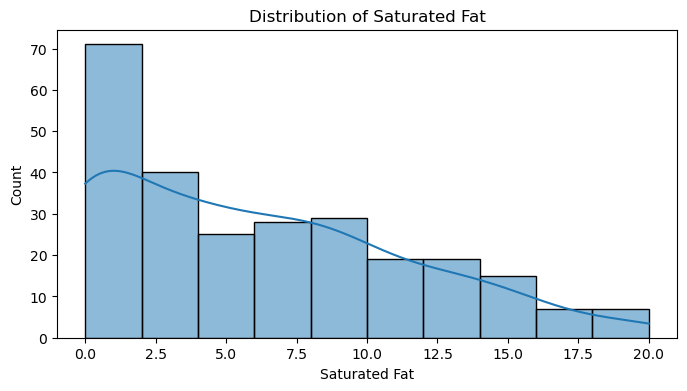

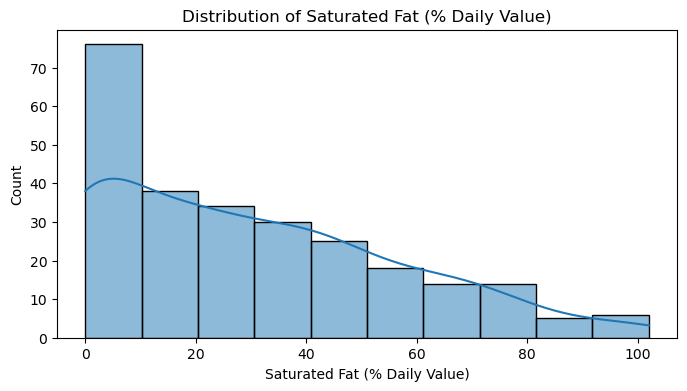

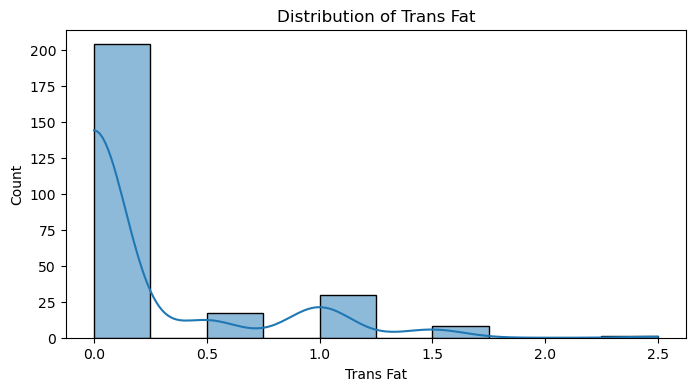

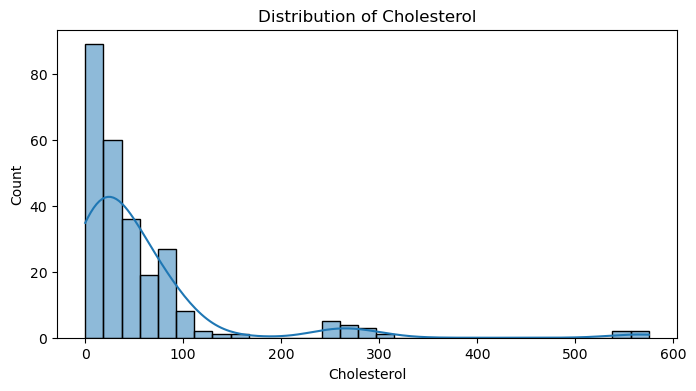

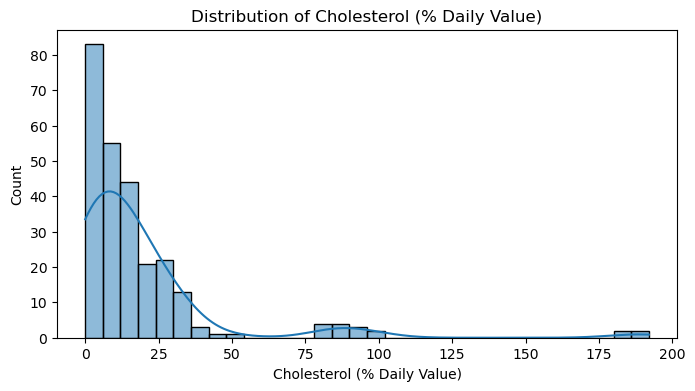

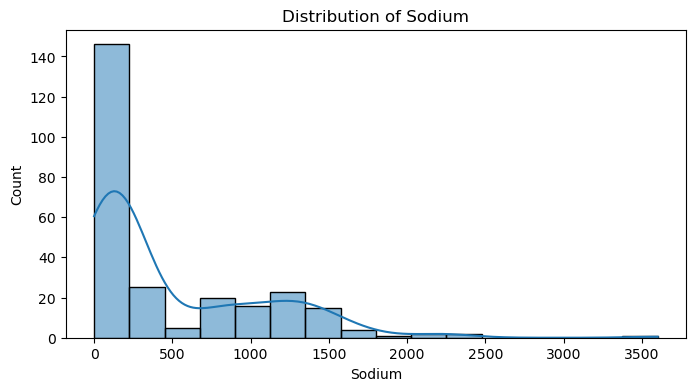

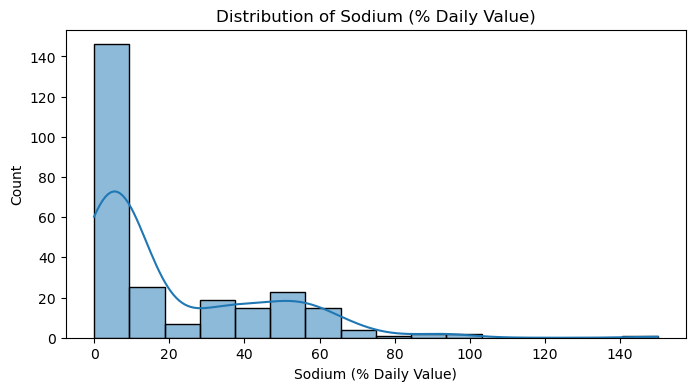

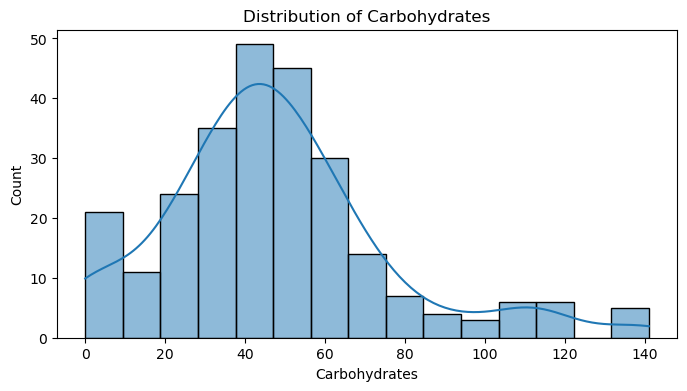

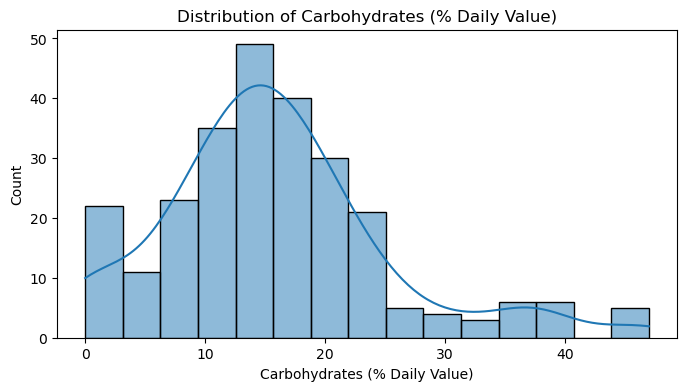

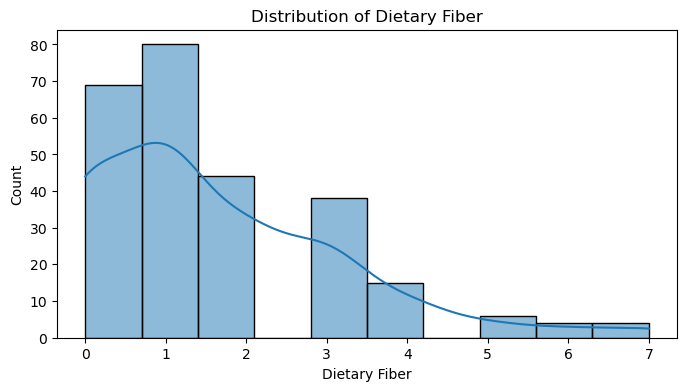

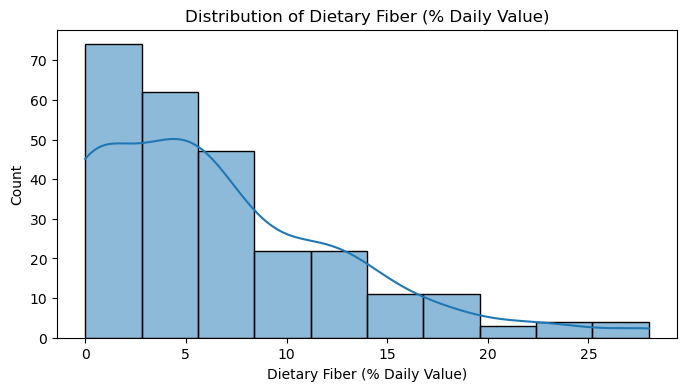

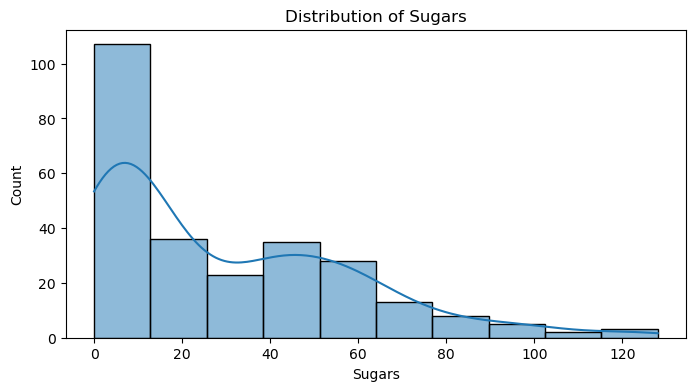

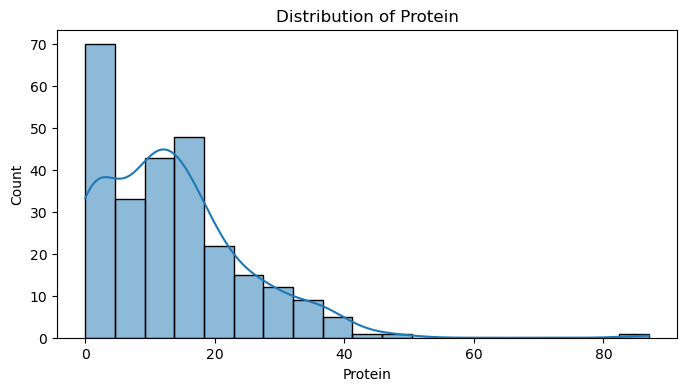

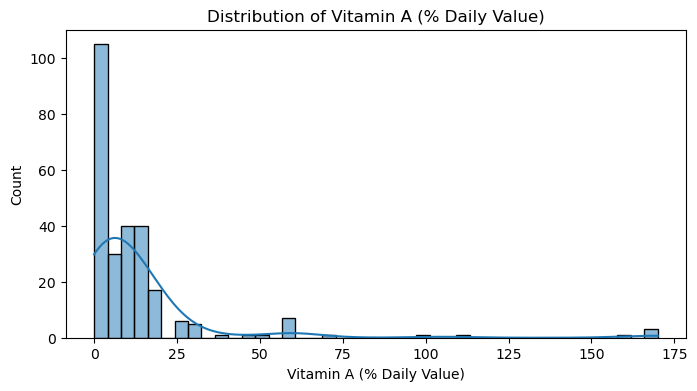

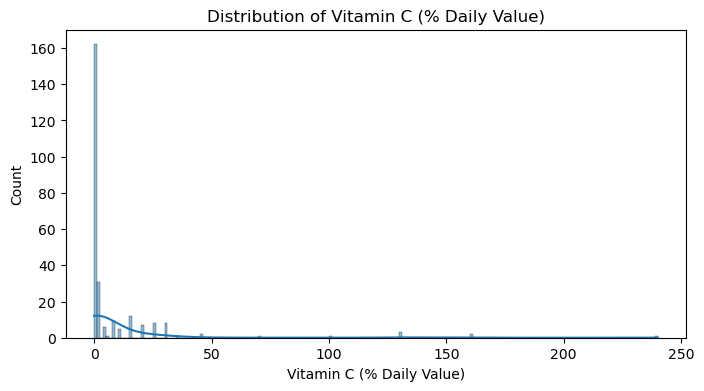

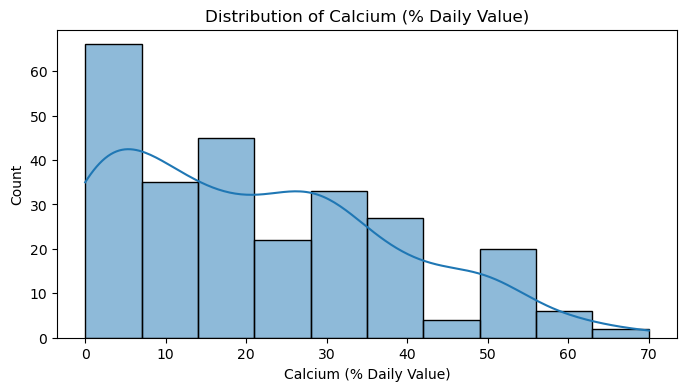

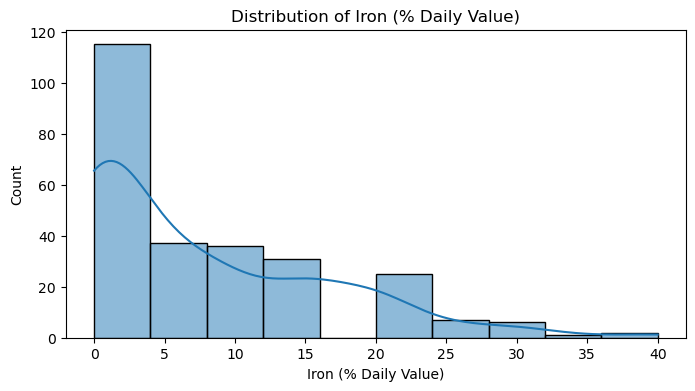

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(nutrition_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [18]:
category_nutrition = nutrition_df.groupby('Category')[numeric_cols].mean()
print(category_nutrition)

                      Calories  Calories from Fat  Total Fat  \
Category                                                       
Beef & Pork         494.000000         224.666667  24.866667   
Beverages           113.703704           0.740741   0.092593   
Breakfast           526.666667         248.928571  27.690476   
Chicken & Fish      552.962963         242.222222  26.962963   
Coffee & Tea        283.894737          71.105263   8.021053   
Desserts            222.142857          64.285714   7.357143   
Salads              270.000000         108.333333  11.750000   
Smoothies & Shakes  531.428571         127.678571  14.125000   
Snacks & Sides      245.769231          94.615385  10.538462   

                    Total Fat (% Daily Value)  Saturated Fat  \
Category                                                       
Beef & Pork                         38.600000      10.466667   
Beverages                            0.148148       0.055556   
Breakfast                           42.

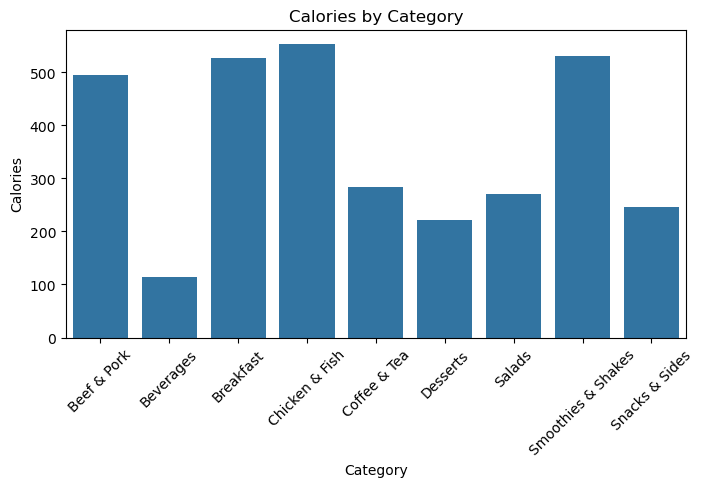

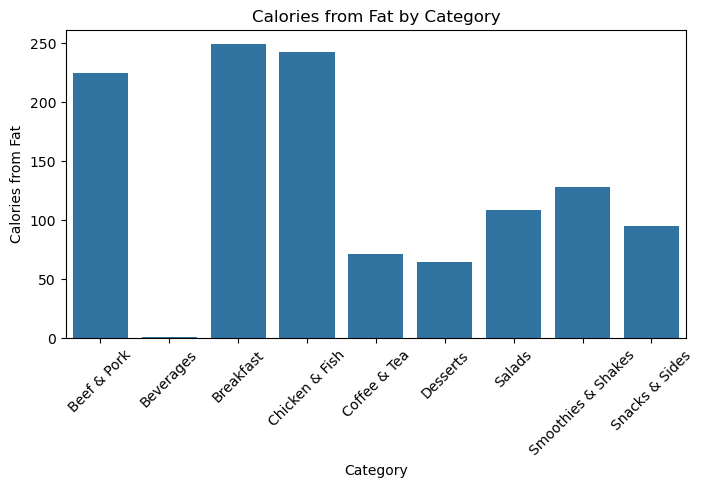

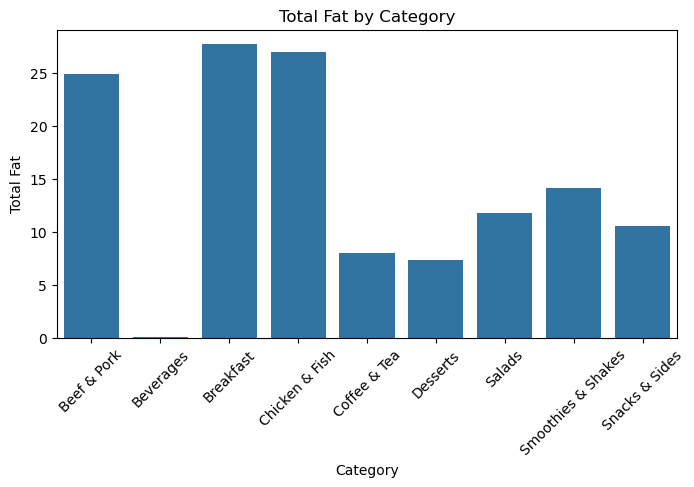

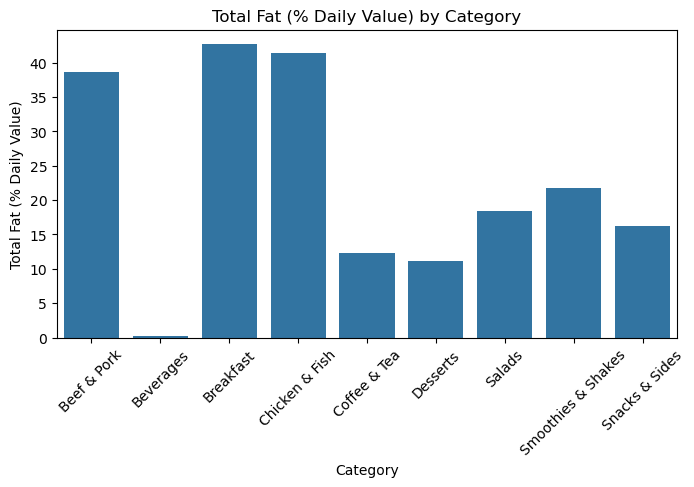

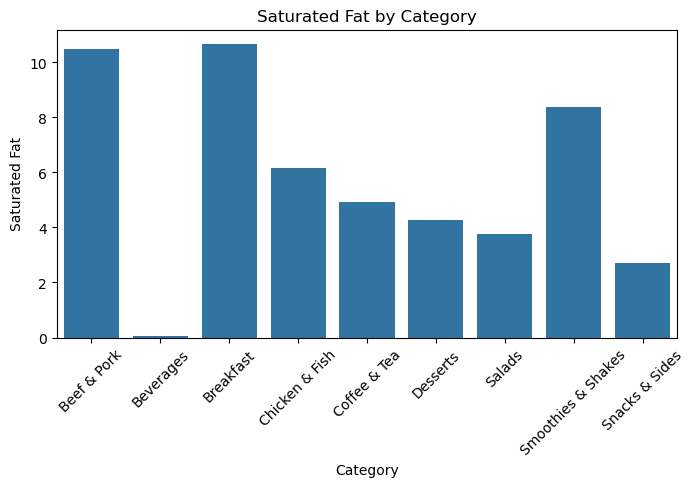

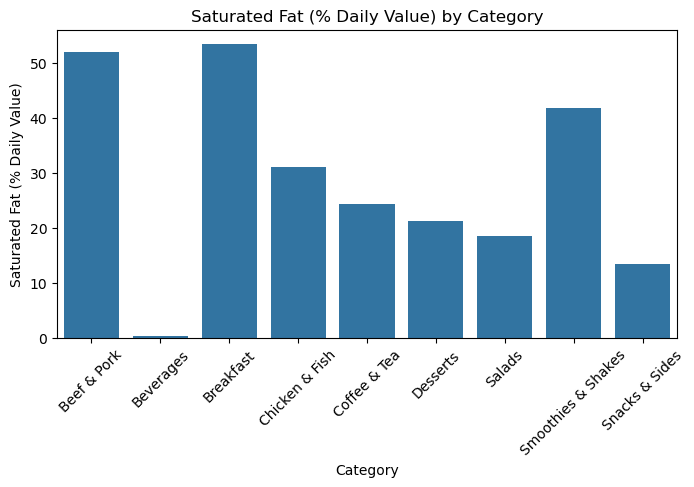

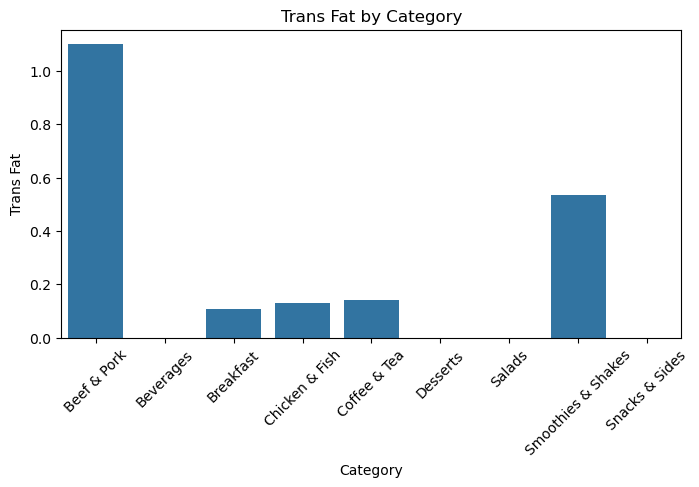

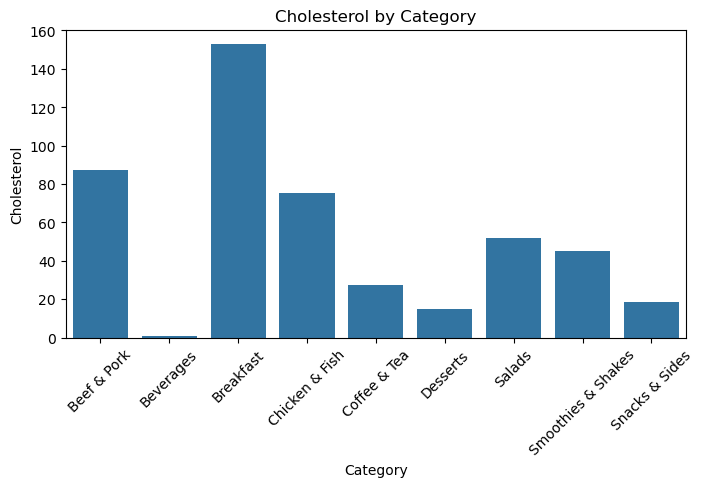

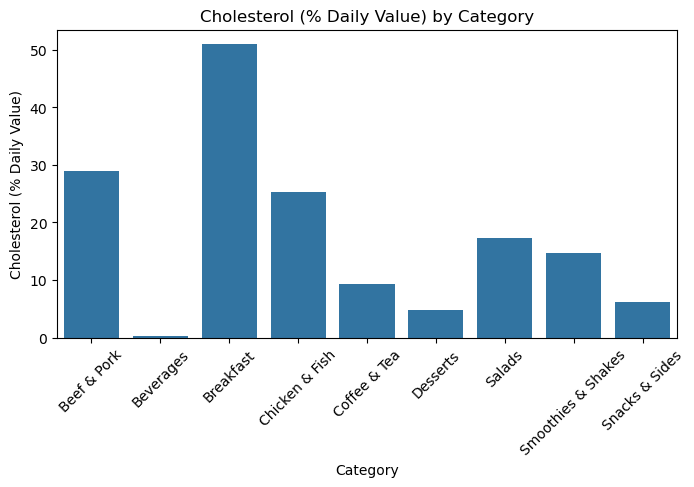

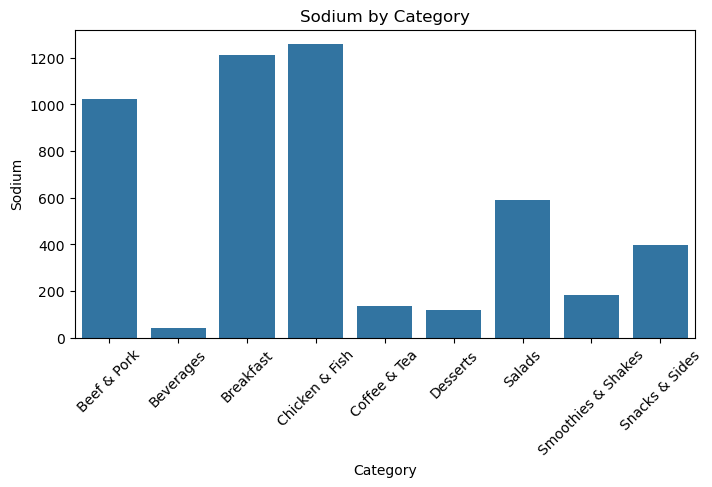

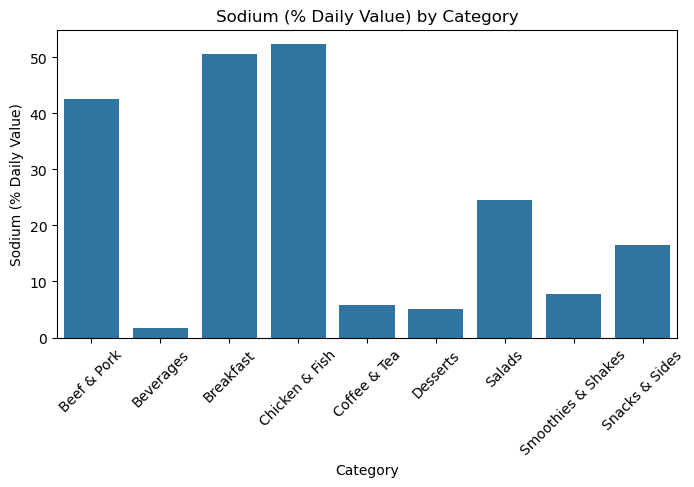

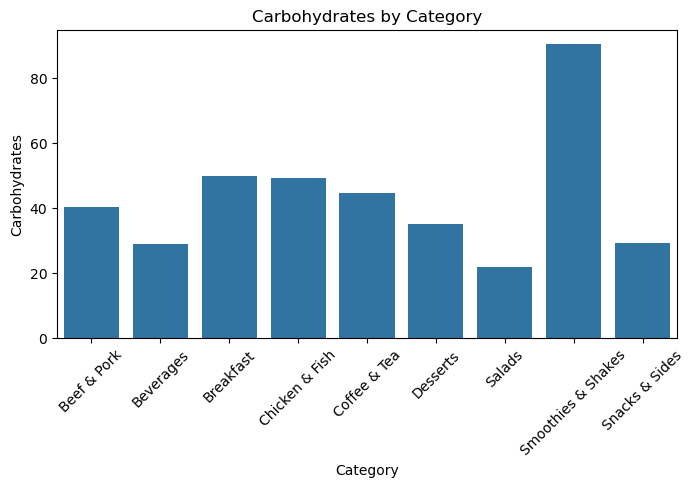

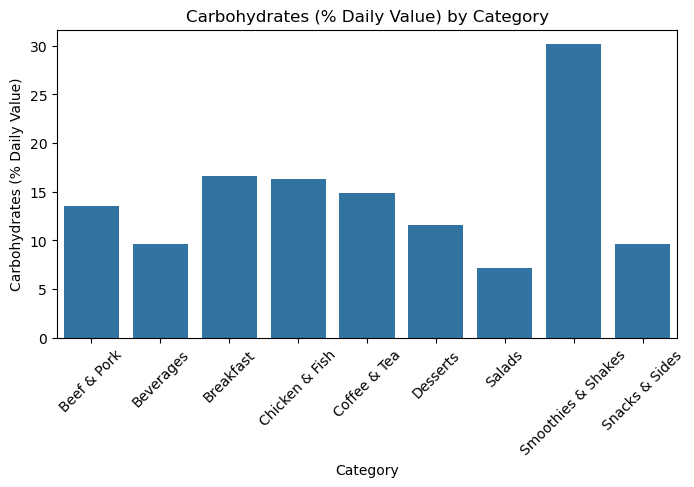

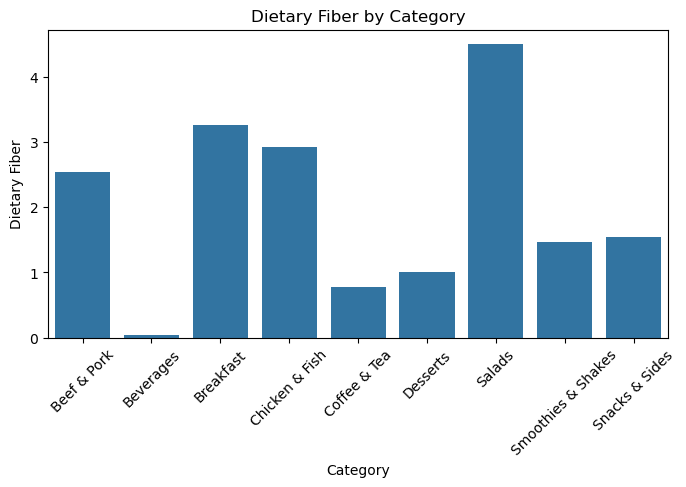

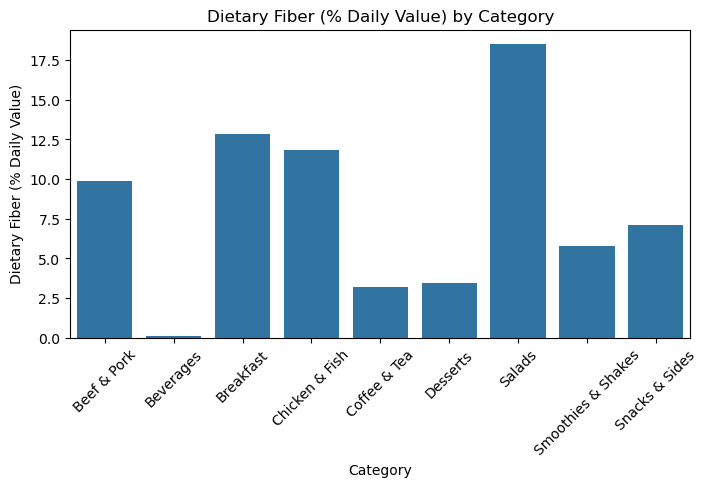

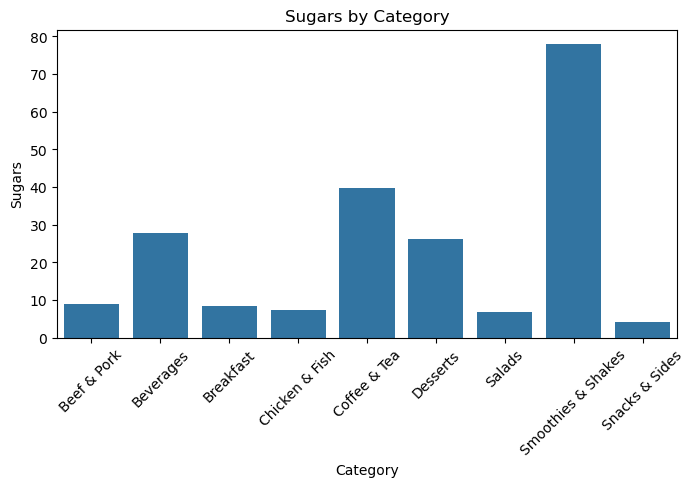

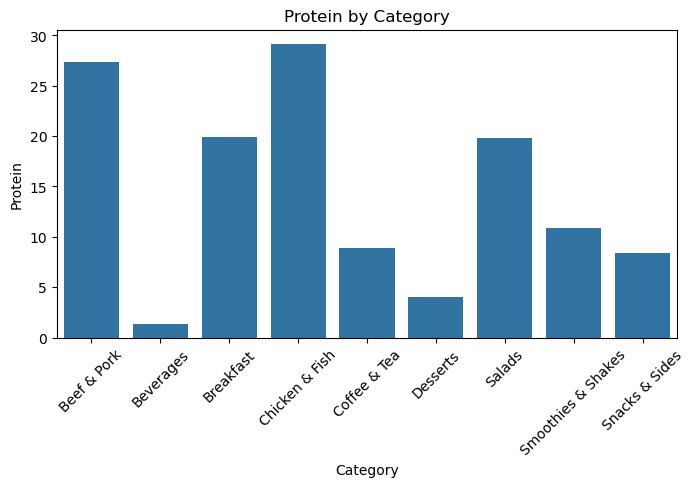

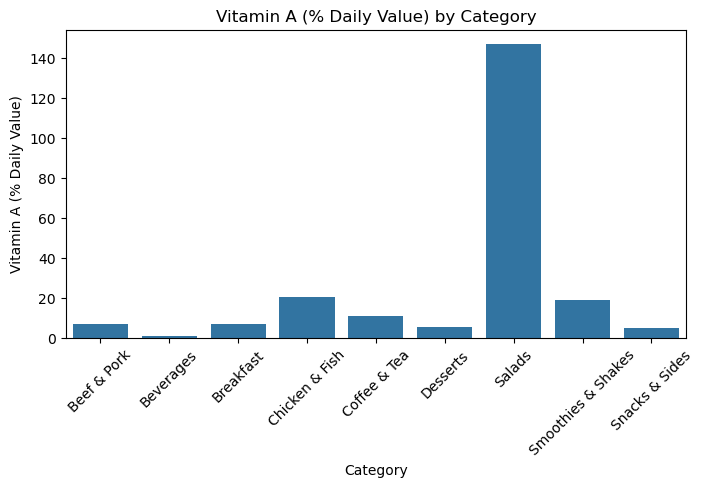

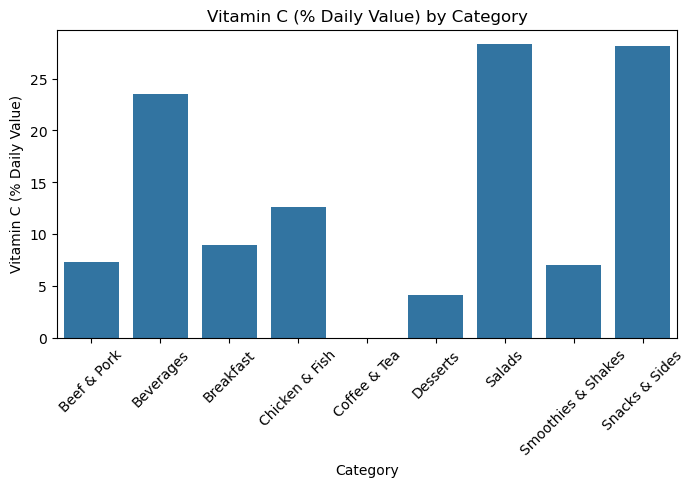

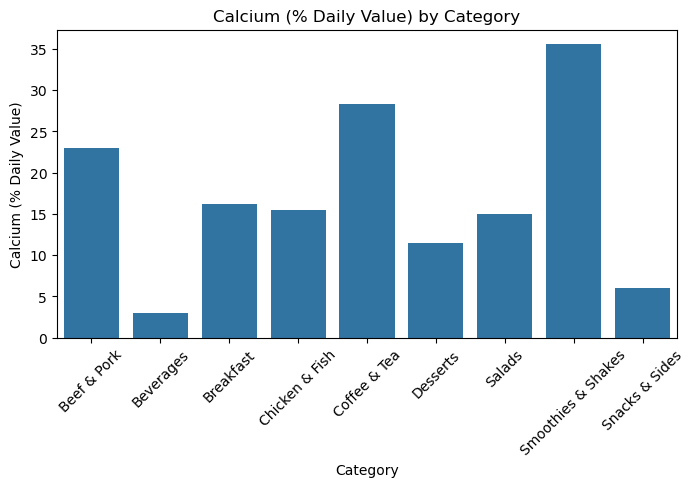

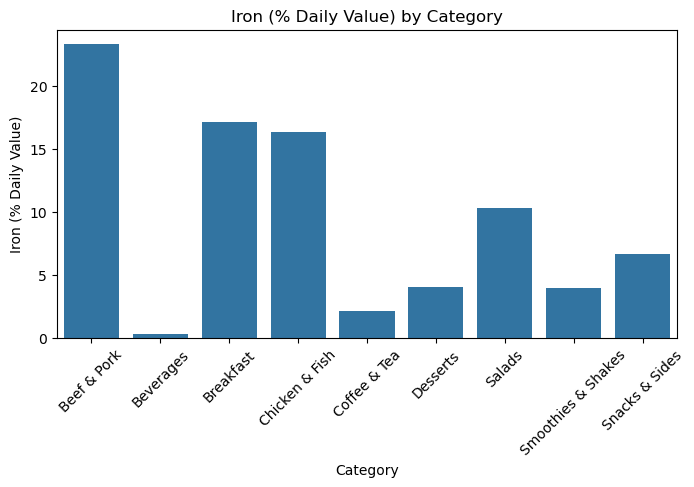

In [20]:
# Plot Nutritional Information by Category
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.barplot(x=category_nutrition.index, y=category_nutrition[col])
    plt.title(f'{col} by Category')
    plt.xlabel('Category')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()


In [21]:
# Top items by Protein content
top_protein_items = nutrition_df.nlargest(10, 'Protein')[['Item', 'Protein']]
print(top_protein_items)

                                             Item  Protein
82                   Chicken McNuggets (40 piece)       87
47             Double Quarter Pounder with Cheese       48
81                   Chicken McNuggets (20 piece)       44
60          Premium Grilled Chicken Club Sandwich       40
64       Bacon Clubhouse Grilled Chicken Sandwich       40
51                         Bacon Clubhouse Burger       39
44            Quarter Pounder with Bacon & Cheese       37
45      Quarter Pounder with Bacon Habanero Ranch       37
31  Big Breakfast with Hotcakes (Regular Biscuit)       36
32    Big Breakfast with Hotcakes (Large Biscuit)       36


In [ ]:
top_protein_items = nutrition_df.nlargest(10, 'Protein')[['Item', 'Protein']]
print(top_protein_items) this line gives "82                   Chicken McNuggets (40 piece)       87
47             Double Quarter Pounder with Cheese       48
81                   Chicken McNuggets (20 piece)       44
60          Premium Grilled Chicken Club Sandwich       40
64       Bacon Clubhouse Grilled Chicken Sandwich       40
51                         Bacon Clubhouse Burger       39
44            Quarter Pounder with Bacon & Cheese       37
45      Quarter Pounder with Bacon Habanero Ranch       37
31  Big Breakfast with Hotcakes (Regular Biscuit)       36
32    Big Breakfast with Hotcakes (Large Biscuit)       36" this as a output what is the first column  means  and contune after analyze specific items again with some extra details and graphs